## Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from scipy.stats import skew
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV,ElasticNet, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer, mean_squared_log_error

## Read in Data Function

In [2]:
def read_process_data(filename):
    
    #read data from csv
    train = pd.read_csv(filename, index_col = 'Id')
    
    #get dummies
    train = pd.get_dummies(train)
    
    #the first 1460 data points are training data
    end_test_data = 1460
    
    # all zeros in which messes with standardization
    if 'MSSubClass_SC150' in train.columns:
        train = train.drop('MSSubClass_SC150',axis=1)
    
    #get test dataset and drop (test) target feature
    test = train.loc[train.index>end_test_data,:].drop(['SalePrice'],axis=1)
    
    #split training data into predictor and target variable
    train = train.loc[train.index<=end_test_data,:]
    
    #do log transform on target variable
    y=np.log1p(train.SalePrice)
    X=train.drop(['SalePrice'],axis=1)
    
    #standardize
    X = (X - X.mean())/X.std()
    
    return(X,y, test)




## Find best Model Fuction

In [10]:
def return_best_model(model,param_grid,  X, y):
    
    CV_object = GridSearchCV(estimator = model,
                        param_grid = param_grid,
                        n_jobs=1,
                        cv = 10,
                        iid=False,
                        verbose=False,
                        scoring='neg_mean_squared_error')
    CV_object.fit(X,y)
    
    best_model = CV_object.best_estimator_
    best_pars = CV_object.best_params_
    
    print('RMSE',np.sqrt(-CV_object.best_score_))
        
    return(best_model,best_pars)
    
 
    
    

## List of Datasets to Build Models

In [51]:
# list of dataset names

data_set_names = ["dataset_1_0",
                  "dataset1_1_delete_outliers",
                  "dataset2_log", 
                  "dataset2_numeric_dummy",
                  "dataset2_addfeatures",
                  "dataset3_1",
                  "dataset3_2",
                  "dataset4_nodup",
                  "dataset4_nodup_nomulcol"]

## Lasso

In [52]:
model_dct={}

for name in data_set_names:
    X,y,test = read_process_data(name+'.csv')
    print(name)
    print(np.shape(X))
    
    #Define model
    lasso_model=Lasso(max_iter=10000)

    #Define hyperparameter tune grid
    #coarser grid
    lassocv = LassoCV(n_alphas=100,cv=5,max_iter=10000)
    lassocv.fit(X,y)
    best_lambda=lassocv.alpha_
    #finer grid
    param_grid = {
    'alpha': best_lambda*np.append(np.logspace(-2,2,30),1)
    }


    model_dct[name] = return_best_model(lasso_model,param_grid,X,y) 
    
    
import pickle
pickle_out=open('CV_Lasso_output_y_full1.pickle','wb')
pickle.dump(model_dct,pickle_out)
pickle_out.close()

dataset_1_0
(1460, 326)
RMSE 0.1417260466832316
dataset1_1_delete_outliers
(1458, 325)
RMSE 0.11067277240071309
dataset2_log
(1458, 355)
RMSE 0.10819867876456082
dataset2_numeric_dummy
(1458, 384)


C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05825008465079229, tolerance: 0.02118585703186397
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0631413120823705, tolerance: 0.021000302896189472
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04192870993640163, tolerance: 0.020627614194068257
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

RMSE 0.10804129858382501
dataset2_addfeatures
(1458, 387)


C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04998066599370432, tolerance: 0.02118585703186397
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06023757804294938, tolerance: 0.021000302896189472
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04013543742681058, tolerance: 0.020627614194068257
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

RMSE 0.107696839241145
dataset3_1
(1458, 330)


C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06042122959129692, tolerance: 0.02118585703186397
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.036984724227645316, tolerance: 0.021000302896189472
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027055592534788175, tolerance: 0.020257294544335776
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

RMSE 0.10899602046380873
dataset3_2
(1458, 198)
RMSE 0.11133784767317527
dataset4_nodup
(1458, 326)


C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06018091761244726, tolerance: 0.02118585703186397
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08706683642837731, tolerance: 0.021000302896189472
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027380105182425396, tolerance: 0.020257294544335776
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

RMSE 0.10898400136587769
dataset4_nodup_nomulcol
(1458, 321)


C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039295792508090344, tolerance: 0.02118585703186397
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.040643300269170624, tolerance: 0.021000302896189472
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02841255638977991, tolerance: 0.020257294544335776
  positive)
C:\Users\gakel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

RMSE 0.10889470307380265


In [53]:
model_dct

{'dataset_1_0': (Lasso(alpha=0.005419571142988388, copy_X=True, fit_intercept=True,
        max_iter=10000, normalize=False, positive=False, precompute=False,
        random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
  {'alpha': 0.005419571142988388}),
 'dataset1_1_delete_outliers': (Lasso(alpha=0.0034510469306799248, copy_X=True, fit_intercept=True,
        max_iter=10000, normalize=False, positive=False, precompute=False,
        random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
  {'alpha': 0.0034510469306799248}),
 'dataset2_log': (Lasso(alpha=0.003015873964476099, copy_X=True, fit_intercept=True,
        max_iter=10000, normalize=False, positive=False, precompute=False,
        random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
  {'alpha': 0.003015873964476099}),
 'dataset2_numeric_dummy': (Lasso(alpha=0.003015873964476099, copy_X=True, fit_intercept=True,
        max_iter=10000, normalize=False, positive=False, precompute=

## XGBoost

In [11]:
from xgboost import XGBRegressor, plot_importance

#Define model
xgb_model = XGBRegressor()

#Define hyperparameter tune grid
param_grid = {
        'min_child_weight': [1, 3, 5],
        'gamma':[0,0.03,0.1],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.8],
        'learning_rate':[0.1,0.07],
        'max_depth': [1, 3, 5]
        }


In [12]:
model_dct={}

for name in data_set_names:
    X,y,test = read_process_data(name+'.csv')
    print(name)
    print(np.shape(X))
    model_dct[name] = return_best_model(xgb_model,param_grid,X,y) 
    
    

    

dataset_1_0
(1460, 326)
RMSE 0.12183431301385385
dataset1_1_delete_outliers
(1458, 325)


KeyboardInterrupt: 

In [19]:
param_grid = {
        'min_child_weight': [3],
        'gamma':[0,0.03],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.8],
        'learning_rate':[0.1,0.07],
        'max_depth': [5]
        }

model_dct={}

for name in data_set_names:
    X,y,test = read_process_data(name+'.csv')
    print(name)
    print(np.shape(X))
    model_dct[name] = return_best_model(xgb_model,param_grid,X,y) 

dataset_1_0
(1460, 326)
RMSE 0.123938772619611
dataset1_1_delete_outliers
(1458, 325)
RMSE 0.11969417411622313
dataset2_log
(1458, 355)
RMSE 0.11743828767121771
dataset2_numeric_dummy
(1458, 384)
RMSE 0.11685476793599713
dataset2_addfeatures
(1458, 387)
RMSE 0.11892909954400363
dataset3_1
(1458, 330)
RMSE 0.11990118133438865
dataset3_2
(1458, 198)
RMSE 0.11851804656450265
dataset4_nodup
(1458, 326)
RMSE 0.1187883080942051
dataset4_nodup_nomulcol
(1458, 321)
RMSE 0.11789823029039127


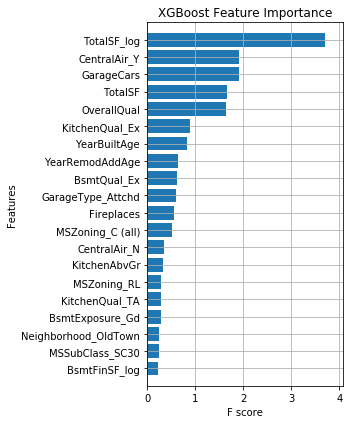

In [48]:
fig, ax = plt.subplots(figsize=(5, 6))

plot_importance(model_dct["dataset2_addfeatures"][0], max_num_features=20, importance_type= 'gain',
                show_values=False, title = "XGBoost Feature Importance",height=0.8,ax=ax) 
#plt.show()
plt.tight_layout()

plt.savefig('plots/temp.png', dpi=300)

In [50]:

pickle_out=open('CV_XGBoost_output_y_full1.pickle','wb')
pickle.dump(model_dct,pickle_out)
pickle_out.close()

